In [5]:
from _tools import *
from datetime import  timedelta
import matplotlib.pyplot as plt

# Define the ratios for splitting
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15
assert train_ratio + val_ratio + test_ratio == 1.0
manipulate_period = True

# **Load all start dates of the .nc files and generate date_ranges.csv**

In [6]:
date_range_df = tools.load_date_range_dataframe(manipulate_period=manipulate_period)

# Print the DataFrame
display(date_range_df.head())
display(date_range_df.describe())

Date ranges loaded from C:\Users\lucas\PycharmProjects\_specialkursus\generated\per_basin_qsim_date_ranges_from.csv


,filename,start_date,end_date,date_diff
0,10000009.nc,2001-01-01,2022-12-31,8034
1,10000010.nc,2001-01-01,2022-12-31,8034
2,10000011.nc,2001-01-01,2022-12-31,8034
3,10000014.nc,2001-01-01,2022-12-31,8034
4,10000016.nc,2001-01-01,2022-12-31,8034


,start_date,end_date,date_diff
count,570,570,570.000000
mean,2007-11-08 01:03:09.473683968,2020-11-09 21:23:22.105263104,4750.847368
min,2001-01-01 00:00:00,2006-01-02 00:00:00,364.000000
25%,2001-01-01 00:00:00,2019-01-01 00:00:00,1850.500000
50%,2002-11-10 00:00:00,2022-12-31 00:00:00,4693.500000
75%,2016-12-01 18:00:00,2022-12-31 00:00:00,8034.000000
max,2021-01-01 00:00:00,2022-12-31 00:00:00,8034.000000
std,NaN,NaN,3121.167389


In [7]:
# include = ['1000102', '1000315', '12000519', '13000055', '13000430', '14000219', '15000044', '15000048', '15000280', '15001056', '16000054', '16000123', '16000215', '16000649', '16001095', '16001309', '16001334', '17002092', '18000005', '18000041', '18000887', '19000075', '19000214', '20000025', '2000014', '20000308', '20000852', '20000856', '21000020', '21000087', '21000462', '21000587', '21000591', '21000643', '21000672', '21000780', '21000782', '21000783', '21000788', '21000791', '21000793', '21000799', '21000806', '21000861', '21000873', '21000923', '21001449', '21001659', '21002451', '21002628', '21006071', '21006072', '21006467', '21006549', '21006597', '22000046', '22000054', '22000057', '22000158', '22000194', '22000419', '22000640', '22001540', '22001541', '22001542', '23000587', '23000994', '25000019', '25000087', '25000275', '25000362', '25000483', '25000629', '25000639', '25001614', '25003595', '25003596', '25003597', '25003599', '27000055', '27000615', '27000638', '27000671', '27000975', '28000051', '29000232', '29000535', '31001108', '32000002', '32000019', '32000030', '33000318', '35000008', '36000061', '36000192', '37000261', '40000165', '41000391', '42000366', '42000379', '42000478', '42001011', '43000246', '43000408', '43000432', '44000020', '44000191', '44000590', '45000044', '45000047', '45000059', '45000117', '45000804', '45001337', '45001404', '45001412', '46000608', '46000641', '46000642', '47000092', '47000429', '47000659', '47001065', '47001141', '51000245', '51000261', '52000040', '52000067', '52001041', '53000618', '54000009', '54000111', '54000184', '57000048', '57000059', '57000073', '57000085', '57000121', '57000643', '57001206', '60000212', '60000650', '6000306', '6000427', '6000428', '61000094', '61000399', '61000441', '7000099', '7000333', '9000172', '9000173', '9000293', '9000451']
# include = ['1000219', '1000228', '11000014', '11000060', '12000195', '13000116', '13000117', '15000045', '15000109', '15001034', '16000130', '16000158', '16000258', '16000261', '16000273', '16000276', '16000410', '16000411', '16000726', '16000777', '16001299', '16001302', '18000040', '18000078', '18000079', '18000454', '19000042', '20000034', '20000042', '20000306', '20000790', '21000065', '21000455', '21000462', '21000529', '21000535', '21000557', '21000563', '21000569', '21000577', '21000760', '21000807', '21001151', '21006035', '21006037', '21006038', '21006206', '21006372', '21006375', '21006462', '23000079', '24000034', '24000148', '24000149', '25000592', '25000673', '25001085', '25001107', '25001149', '25003189', '25003217', '26000037', '26000084', '26000103', '26000111', '26000114', '26000151', '26000170', '31000044', '32000030', '34000260', '34000469', '36000015', '36000016', '37000249', '37000255', '37000259', '38000019', '38000209', '38000221', '38000246', '38000250', '41000124', '41000129', '41000284', '41000695', '44000106', '44000177', '44000188', '45000368', '45000369', '47000032', '47000060', '47000061', '47000422', '47000429', '47001025', '48000115', '48000317', '49000090', '49000092', '49000227', '52000870', '53000235', '55000444', '55000445', '56000070', '56000071', '56000073', '57000494', '61000399', '61000441', '64000033', '9001110']
# filenames = [f"{i}.nc" for i in include]

date_range_df_filtered = date_range_df#[date_range_df['filename'].isin(filenames)]

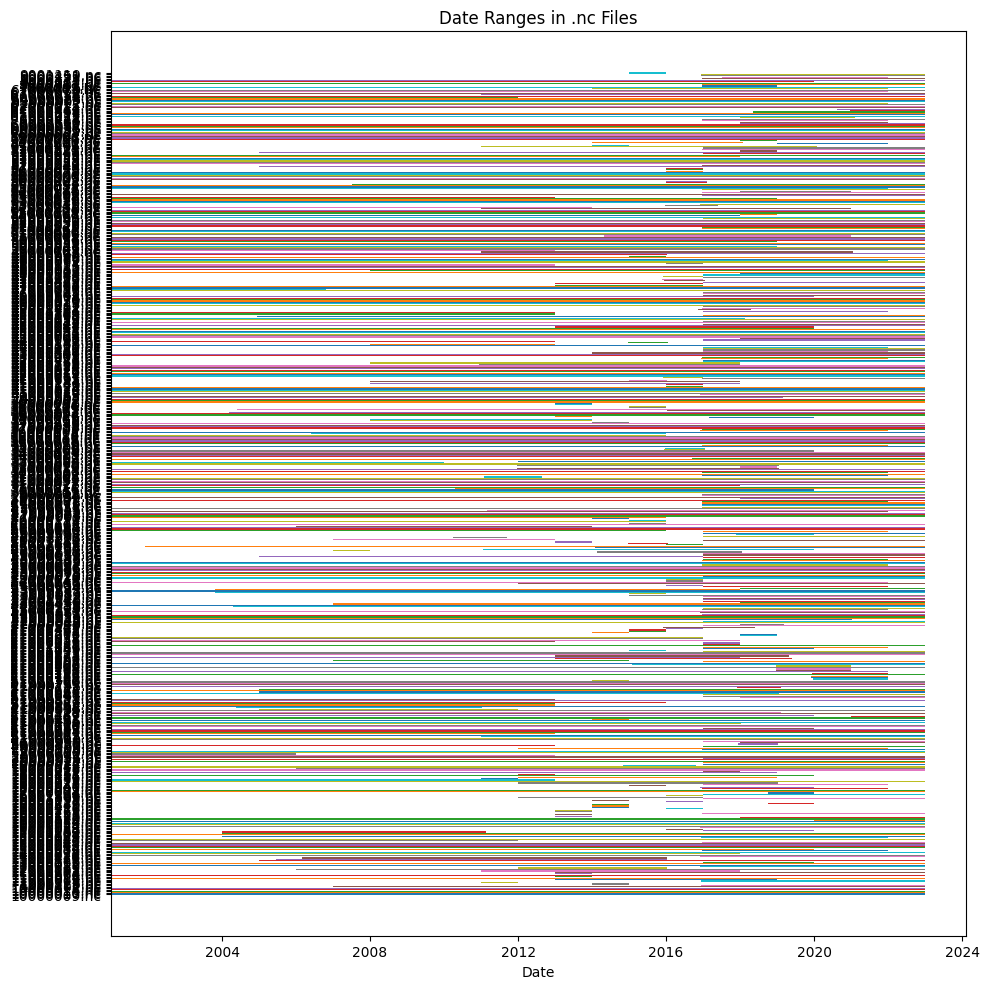

In [8]:
# Visualization using a Gantt chart
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the date ranges
for i, row in date_range_df_filtered.iterrows():
    ax.barh(i, (row['end_date'] - row['start_date']).days + 1, left=row['start_date'])

# Set y-axis labels
ax.set_yticks(range(len(date_range_df_filtered)))
ax.set_yticklabels(date_range_df_filtered['filename'])

# Format x-axis as dates
ax.xaxis_date()
ax.set_xlabel('Date')
ax.set_title('Date Ranges in .nc Files')

plt.tight_layout()
plt.show()

In [9]:
# show how many files have below 365 days
date_range_df[date_range_df['date_diff'] < 365*1.30].count()

filename      76
start_date    76
end_date      76
date_diff     76
dtype: int64

# **Split on % for each basin (per_basin... in config)**

In [11]:
import pickle
import os

# Function to split date ranges based on percentage
def split_date_ranges(start_date, end_date, train_ratio, val_ratio, test_ratio):
    total_days = (end_date - start_date).days + 1
    train_days = int(total_days * train_ratio)
    val_days = int(total_days * val_ratio)
    test_days = total_days - train_days - val_days

    train_end_date = start_date + timedelta(days=train_days - 1)
    val_end_date = train_end_date + timedelta(days=val_days)
    test_end_date = end_date

    return {
        'train': {'start_date': start_date, 'end_date': train_end_date},
        'validation': {'start_date': train_end_date + timedelta(days=1), 'end_date': val_end_date},
        'test': {'start_date': val_end_date + timedelta(days=1), 'end_date': test_end_date}
    }

# Directory to save the pickle files
if is_qsim:
    split_data_dir = os.path.join(PROJECT_DATA_CONFIG_PATH, 'per_basin_qsim')
else:
    split_data_dir = os.path.join(PROJECT_DATA_CONFIG_PATH, 'per_basin')
os.makedirs(split_data_dir, exist_ok=True)

train_dict = {}
val_dict = {}
test_dict = {}
basins = []
# Iterate over each .nc file and split the date ranges
for filename in date_range_df_filtered['filename'].unique():
    basin = filename.split('.')[0]
    file_data = date_range_df[date_range_df['filename'] == filename].iloc[0]
    start_date = file_data['start_date']
    end_date = file_data['end_date']

    split_dates = split_date_ranges(start_date, end_date, train_ratio, val_ratio, test_ratio)

    train_dict[basin] = {'start_dates': [], 'end_dates': []}
    train_dict[basin]['start_dates'].append(split_dates['train']['start_date'])
    train_dict[basin]['end_dates'].append(split_dates['train']['end_date'])
    val_dict[basin] = {'start_dates': [], 'end_dates': []}
    val_dict[basin]['start_dates'].append(split_dates['validation']['start_date'])
    val_dict[basin]['end_dates'].append(split_dates['validation']['end_date'])
    test_dict[basin] = {'start_dates': [], 'end_dates': []}
    test_dict[basin]['start_dates'].append(split_dates['test']['start_date'])
    test_dict[basin]['end_dates'].append(split_dates['test']['end_date'])
    basins.append(basin)
    
# Save the split dates dictionary to a pickle file
 
with open(pj(split_data_dir, 'per_basin_train_periods_file.pkl'), 'wb') as f:
    pickle.dump(train_dict, f)

with open(pj(split_data_dir, 'per_basin_val_periods_file.pkl'), 'wb') as f:
    pickle.dump(val_dict, f)

with open(pj(split_data_dir, 'per_basin_test_periods_file.pkl'), 'wb') as f:
    pickle.dump(test_dict, f)

with open(pj(split_data_dir, 'train_basin_file.txt'), 'wb') as f:
    f.write("\n".join(basins).encode())
    
with open(pj(split_data_dir, 'validation_basin_file.txt'), 'wb') as f:
    f.write("\n".join(basins).encode())
    
with open(pj(split_data_dir, 'test_basin_file.txt'), 'wb') as f:
    f.write("\n".join(basins).encode())

print(f"Split date ranges saved to {split_data_dir}")
print(f'Available basins saved to {split_data_dir}/train_basin_file.txt')

Split date ranges saved to C:\Users\lucas\PycharmProjects\_specialkursus\generated\data_config\per_basin_qsim
Available basins saved to C:\Users\lucas\PycharmProjects\_specialkursus\generated\data_config\per_basin_qsim/train_basin_file.txt


In [7]:
display(train_dict['10000009'])
display(test_dict['10000009'])
display(val_dict['10000009'])

{'start_dates': [Timestamp('2011-01-01 00:00:00')],
 'end_dates': [Timestamp('2019-05-26 00:00:00')]}

{'start_dates': [Timestamp('2021-03-14 00:00:00')],
 'end_dates': [Timestamp('2022-12-31 00:00:00')]}

{'start_dates': [Timestamp('2019-05-27 00:00:00')],
 'end_dates': [Timestamp('2021-03-13 00:00:00')]}

# **Split on dates based on % threshold**

The first date we have data for is: 2001-01-01 00:00:00
The date where 70% of the data is accumulated up until this date is: 2017-05-15 00:00:00
The date where 85% of the data is accumulated up until this date is: 2020-01-13 00:00:00
The last date we have data for is: 2022-12-31 00:00:00

File lists saved to:
  Train files: C:\Users\lucas\PycharmProjects\_specialkursus\generated\data_config\train_basin_file.txt
  Validation files: C:\Users\lucas\PycharmProjects\_specialkursus\generated\data_config\validation_basin_file.txt
  Test files: C:\Users\lucas\PycharmProjects\_specialkursus\generated\data_config\test_basin_file.txt

Split Summary:
Total files: 570
Training files: 570 with 1896142 samples
Validation files: 570 with 406316 samples
Test files: 570 with 406316 samples


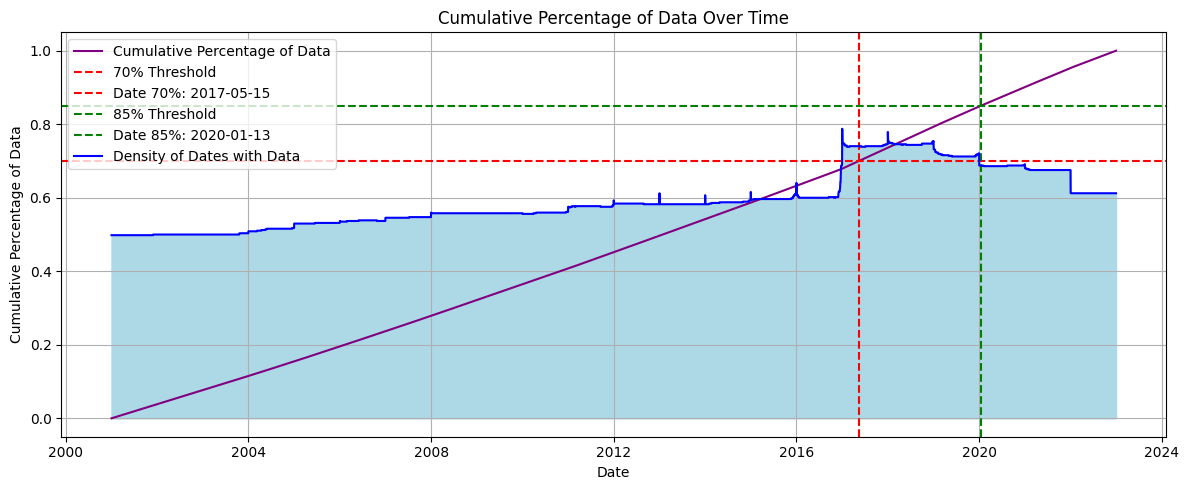

In [14]:
save_train_test_validation_files = True

# Create a date range from the earliest start date to the latest end date
overall_start_date = date_range_df['start_date'].min()
overall_end_date = date_range_df['end_date'].max()
total_days = (overall_end_date - overall_start_date).days + 1

# Create a DataFrame to hold the date and count
date_list = [overall_start_date + timedelta(days=x) for x in range(total_days)]
date_counts = pd.DataFrame({'date': date_list, 'count': 0})

# For each date range, increment the count for the dates covered
for index, row in date_range_df.iterrows():
    start_idx = (row['start_date'] - overall_start_date).days
    end_idx = (row['end_date'] - overall_start_date).days
    date_counts.loc[start_idx:end_idx + 1, 'count'] += 1  # Include end date

# Compute the total number of data points
total_data_points = date_counts['count'].sum()

# Compute the cumulative sum of data points over dates
date_counts['cumulative_count'] = date_counts['count'].cumsum()

# Compute the cumulative percentage
date_counts['cumulative_percentage'] = date_counts['cumulative_count'] / total_data_points

# Print the first date we have data for
print(f"The first date we have data for is: {date_counts['date'].iloc[0]}")

# Find the dates where cumulative percentage reaches or exceeds thresholds
thresholds = [train_ratio, train_ratio + val_ratio]
dates_thresholds = []
for threshold in thresholds:
    date_threshold = date_counts[date_counts['cumulative_percentage'] >= threshold].iloc[0]['date']
    dates_thresholds.append(date_threshold)
    print(f"The date where {int(threshold * 100)}% of the data is accumulated up until this date is: {date_threshold}")

# Print the last date we have data for
print(f"The last date we have data for is: {date_counts['date'].iloc[-1]}")

date_70_percent, date_85_percent = dates_thresholds

# Save the file lists to CSV files
all_filenames = date_range_df['filename'].values
train_df = pd.DataFrame({'filename': all_filenames})
test_df = pd.DataFrame({'filename': all_filenames})
validation_df = pd.DataFrame({'filename': all_filenames})

if save_train_test_validation_files:
    tmp_train_df = train_df.copy()[['filename']].apply(lambda x: x.str.split('.').str[0])
    tmp_val_df = validation_df.copy()[['filename']].apply(lambda x: x.str.split('.').str[0])
    tmp_test_df = test_df.copy()[['filename']].apply(lambda x: x.str.split('.').str[0])
    tmp_train_df.to_csv(TRAIN_BASIN_FILE, index=False, header=False)
    tmp_val_df.to_csv(VALIDATION_BASIN_FILE, index=False, header=False)
    tmp_test_df.to_csv(TEST_BASIN_FILE, index=False, header=False)

    print("\nFile lists saved to:")
    print(f"  Train files: {TRAIN_BASIN_FILE}")
    print(f"  Validation files: {VALIDATION_BASIN_FILE}")
    print(f"  Test files: {TEST_BASIN_FILE}")

# Calculate the total number of data samples in each split
train_samples = date_range_df[date_range_df['filename'].isin(train_df['filename'])]['date_diff'].sum()
validation_samples = date_range_df[date_range_df['filename'].isin(validation_df['filename'])]['date_diff'].sum()
test_samples = date_range_df[date_range_df['filename'].isin(test_df['filename'])]['date_diff'].sum()

total_files = len(date_range_df)
# Print summary
print("\nSplit Summary:")
print(f"Total files: {total_files}")
print(f"Training files: {len(train_df)} with {int(train_ratio * total_data_points)} samples")
print(f"Validation files: {len(validation_df)} with {int(val_ratio * total_data_points)} samples")
print(f"Test files: {len(test_df)} with {int(test_ratio * total_data_points)} samples")

plt.figure(figsize=(12, 5))

plt.plot(date_counts['date'], date_counts['cumulative_percentage'], color='purple', label='Cumulative Percentage of Data')

colors = [
    'red',
    'green',
]
# colors = np.random.rand(len(thresholds), 3)
for i, (threshold, color) in enumerate(zip(thresholds, colors)):
    plt.axhline(y=threshold, color=color, linestyle='--', label=f'{int(threshold * 100)}% Threshold')
    plt.axvline(x=dates_thresholds[i], color=color, linestyle='--', label=f'Date {int(threshold * 100)}%: {dates_thresholds[i].date()}')

plt.plot(date_counts['date'], date_counts['count'] / total_files, color='blue', label='Density of Dates with Data')
plt.fill_between(date_counts['date'], date_counts['count'] / total_files, color='lightblue')
plt.xlabel('Date')
plt.ylabel('Cumulative Percentage of Data')
plt.title('Cumulative Percentage of Data Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(pj(PROJECT_FIGURES_PATH, 'cumulative_percentage_of_data_over_time.png'), dpi=100)
plt.show()

# **Split on catchments**


Split Summary:
Total files: 570
Training files: 399 with 1878275 samples
Validation files: 85 with 386862 samples
Test files: 86 with 442846 samples


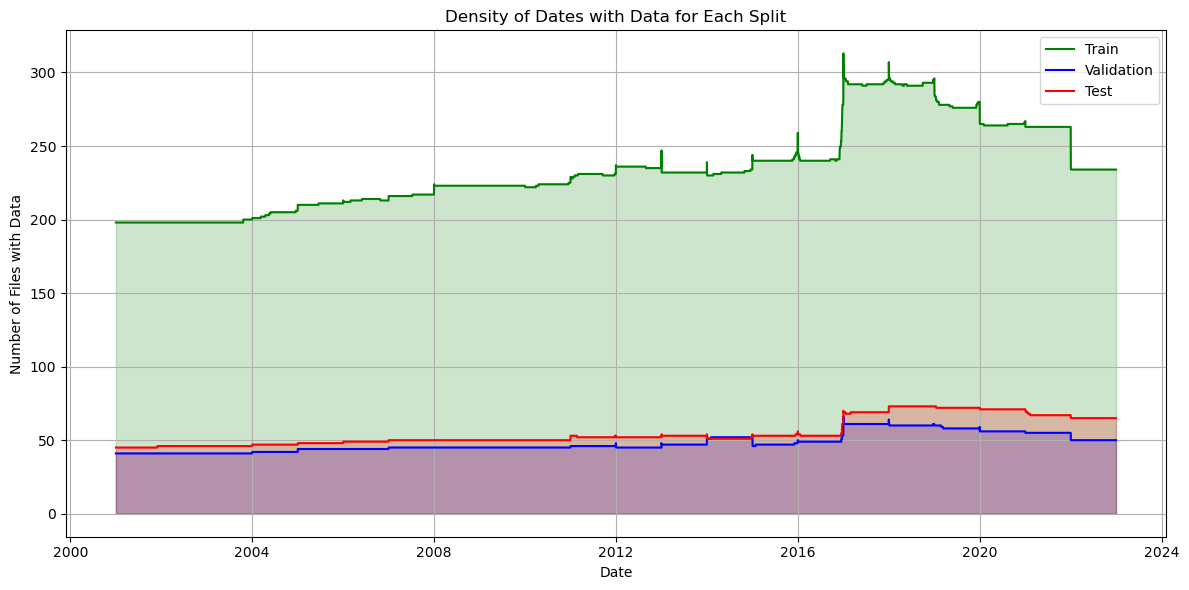

In [18]:
save_train_test_validation_files = False

# Randomly shuffle the DataFrame
df_shuffled = date_range_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Define the ratios for splitting
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Calculate the number of files for each set
total_files = len(df_shuffled)
train_count = int(total_files * train_ratio)
val_count = int(total_files * val_ratio)
test_count = total_files - train_count - val_count  # Ensure all files are included

# Split the DataFrame
train_df = df_shuffled.iloc[:train_count]
val_df = df_shuffled.iloc[train_count:train_count + val_count]
test_df = df_shuffled.iloc[train_count + val_count:]

if save_train_test_validation_files:
    # Save the split information to CSV files
    tmp_train_df = train_df.copy()[['filename']].apply(lambda x: x.str.split('.').str[0])
    tmp_val_df = val_df.copy()[['filename']].apply(lambda x: x.str.split('.').str[0])
    tmp_test_df = test_df.copy()[['filename']].apply(lambda x: x.str.split('.').str[0])
    tmp_train_df.to_csv(TRAIN_BASIN_FILE, index=False, header=False)
    tmp_val_df.to_csv(VALIDATION_BASIN_FILE, index=False, header=False)
    tmp_test_df.to_csv(TEST_BASIN_FILE, index=False, header=False)
    
    print("\nFile lists saved to:")
    print(f"  Train files: {TRAIN_BASIN_FILE}")
    print(f"  Validation files: {VALIDATION_BASIN_FILE}")
    print(f"  Test files: {TEST_BASIN_FILE}")

# Print summary
print("\nSplit Summary:")
print(f"Total files: {total_files}")
print(f"Training files: {len(train_df)} with {train_df['date_diff'].sum()} samples")
print(f"Validation files: {len(val_df)} with {val_df['date_diff'].sum()} samples")
print(f"Test files: {len(test_df)} with {test_df['date_diff'].sum()} samples")

# Plot the density of dates with data for each split
# Create a date range from the earliest start date to the latest end date
overall_start_date = date_range_df['start_date'].min()
overall_end_date = date_range_df['end_date'].max()
total_days = (overall_end_date - overall_start_date).days + 1
date_list = [overall_start_date + timedelta(days=x) for x in range(total_days)]
date_counts = pd.DataFrame({'date': date_list})


# Function to calculate date counts for a given DataFrame
def get_date_counts(df_split):
    counts = pd.DataFrame({'date': date_list, 'count': 0})
    for index, row in df_split.iterrows():
        start_idx = (row['start_date'] - overall_start_date).days
        end_idx = (row['end_date'] - overall_start_date).days
        counts.loc[start_idx:end_idx + 1, 'count'] += 1  # Include end date
    return counts['count']


# Get date counts for each split
train_date_counts = get_date_counts(train_df)
val_date_counts = get_date_counts(val_df)
test_date_counts = get_date_counts(test_df)

# Plotting the densities
plt.figure(figsize=(12, 6))
plt.plot(date_counts['date'], train_date_counts, label='Train', color='green')
plt.plot(date_counts['date'], val_date_counts, label='Validation', color='blue')
plt.plot(date_counts['date'], test_date_counts, label='Test', color='red')
plt.fill_between(date_counts['date'], train_date_counts, color='green', alpha=0.2)
plt.fill_between(date_counts['date'], val_date_counts, color='blue', alpha=0.2)
plt.fill_between(date_counts['date'], test_date_counts, color='red', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Number of Files with Data')
plt.title('Density of Dates with Data for Each Split')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()